In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# load merged_past_year.csv
df = pd.read_csv('new_222_data_original.csv')
# get rid of columns with more than 10% missing values
df = df.loc[:, df.isnull().mean() < .1]
# get rid of the rows where microbusiness_density is null
df = df[df['microbusiness_density'].notna()]
# get rid of the rows where microbusiness_density is 0
df = df[df['microbusiness_density'] != 0]


In [3]:
# get rid of the columns in gtrend_features
gtrend_features = ['tax', 'loan', 'business', 'rent', 'college', 'apartments', 'office', 'insurance', 'Business plan templates', 
                   'Small business ideas', 'How to start a small business', 'office space for rent', 'website hosting service', 
                   'freelancing', 'side hustle', 'ecommerce', 'tax_pct', 'loan_pct', 'business_pct', 'rent_pct', 'college_pct', 
                   'apartments_pct', 'office_pct', 'insurance_pct', 'Business plan templates_pct', 'Small business ideas_pct', 
                   'How to start a small business_pct', 'office space for rent_pct', 'website hosting service_pct', 'freelancing_pct', 
                   'side hustle_pct', 'ecommerce_pct']
df = df.drop(gtrend_features, axis=1)
df.head()

,county,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_adult_smoking,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_children_in_poverty,prev_year_children_in_single_parent_households,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_excessive_drinking,prev_year_flu_vaccinations,prev_year_food_environment_index,prev_year_high_school_completion,prev_year_income_inequality,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_low_birthweight,prev_year_mammography_screening,prev_year_mental_health_providers,prev_year_physical_inactivity,prev_year_poor_mental_health_days,prev_year_poor_or_fair_health,prev_year_poor_physical_health_days,prev_year_premature_death,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_sexually_transmitted_infections,prev_year_social_associations,prev_year_some_college,prev_year_teen_births,prev_year_unemployment,prev_year_uninsured,prev_year_violent_crime,prev_yr_rent_50_0,prev_yr_rent_50_1,prev_yr_rent_50_2,prev_yr_rent_50_3,prev_yr_rent_50_4,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,Top_Marginal_Corporate_Income_Tax_Rate,"Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)","Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Right-to-Work_State_Flag_(option to join or support a union),Tax_Expenditure_Limits,deaths_number,death_pct_diff,GPT_Autoencoder_dim0,GPT_Autoencoder_dim1,GPT_Autoencoder_dim2,GPT_Autoencoder_dim3,GPT_Autoencoder_dim4,GPT_Autoencoder_dim5,GPT_Autoencoder_dim6,GPT_Autoencoder_dim7,GPT_Autoencoder_dim8,GPT_Autoencoder_dim9,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Connected_Economy,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,National_PI,pop_2010,pop_2015,pop_2020,pop_5yr_pct_chg,pop_10yr_pct_chg,PrevYr_RGDP,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoMn_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,Prev_Yr_GoMf_Pct_GDP,two_yrs_prior_pct_bb,two_yrs_prior_pct_college,two_yrs_prior_pct_foreign_born,two_yrs_prior_pct_it_workers,two_yrs_prior_median_hh_inc,microbusiness_density
0,1001.0,0.69,0.33,0.20,10.4,0.33,0.16,0.25,2940.0,0.84,0.0,0.86,0.14,0.42,6.7,0.89,5.1,68.0,0.38,0.09,0.39,3490.0,0.31,4.9,0.20,4.5,7800.0,6650.0,2140.0,0.14,504.5,12.2,0.60,24.0,0.027,0.10,272.0,685.0,820.0,972.0,1229.0,1628.0,0.0,0.04,0.06,-1.8,14.37,26.04,20.87,0.0,0.55,0.06,583.5,65.6,7.25,1.33,1.0,0.0,7281.916667,0.056349,-0.000740,0.000235,0.000044,0.000279,6.705523e-08,0.000106,-0.000065,0.000241,-0.000282,-0.000730,1.640334,0.260667,-0.150069,0.475759,0.130561,-0.035195,-0.332714,-0.021657,-0.231671,-0.127441,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21732.975,54761.0,54903.0,56145.0,2.262171,2.527346,1502153.0,1.59,1.20,6.77,14.67,3.73,16.22,6.16,2.87,10.92,2.81,21.98,17.92,82.7,16.7,2.3,0.6,57982.0,3.376788
1,1003.0,0.74,0.30,0.19,7.2,0.30,0.14,0.22,2030.0,0.83,0.0,0.84,0.19,0.46,7.8,0.91,4.4,73.0,

In [4]:
df.to_csv('new_222_data_cleaned_full.csv', index=False)

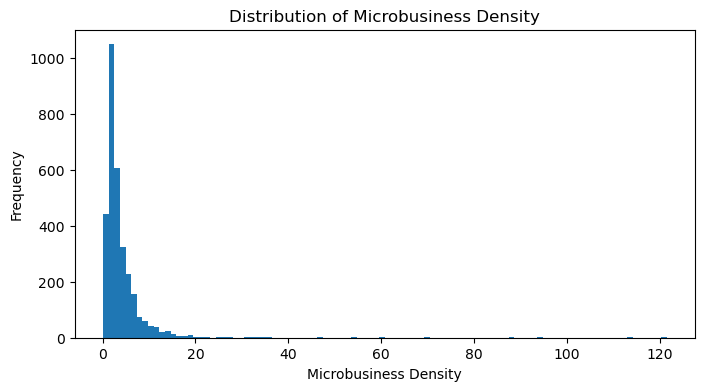

In [5]:
# plot the distribution of microbusiness_density
plt.figure(figsize=(8, 4))
plt.hist(df['microbusiness_density'], bins=100)
plt.xlabel('Microbusiness Density')
plt.ylabel('Frequency')
plt.title('Distribution of Microbusiness Density')
plt.show()

### If your target variable is long-tail Pareto distributed, it is important to take into account the nature of the distribution when fitting your ML models. Here are a few suggestions:

1. Transform the target variable: One common approach is to transform the target variable using a power law transformation, such as taking the log or square root. This can help to normalize the distribution and improve the performance of many ML models.

2. Use a model that can handle skewed distributions: Some models, such as decision trees and random forests, can handle skewed distributions relatively well. Other models, such as linear regression, may not perform as well when the target variable is highly skewed.

3. Consider using an alternative loss function: If you are using a model that involves minimizing a loss function, such as linear regression or logistic regression, you may want to consider using a loss function that is better suited to the Pareto distribution. One option is to use the quantile loss function, which places more emphasis on accurately predicting the tail of the distribution.

4. Resample your data: If you have a highly imbalanced dataset, where the majority of your target variable values are concentrated in a small range, you may want to consider resampling your data to ensure that you have enough examples of the tail of the distribution to train your model effectively.

5. Consider ensemble methods: Ensembling multiple models that are each trained on different subsets of the data can be an effective approach when dealing with long-tail Pareto distributions, as it can help to capture the variability in the data more effectively.

#### It is important to keep in mind that the specific approach you choose may depend on the characteristics of your data and the goals of your analysis. Experimenting with different methods and evaluating their performance on a holdout set or through cross-validation can help you determine the best approach for your specific use case.

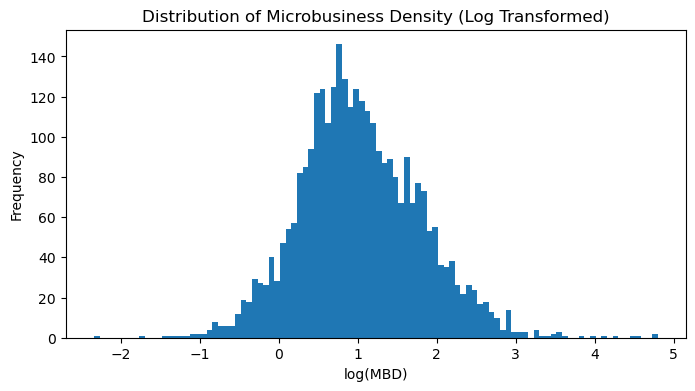

In [6]:
# plot the distribution of microbusiness_density after log transformation
plt.figure(figsize=(8, 4))
plt.hist(np.log(df['microbusiness_density']), bins=100)
plt.xlabel('log(MBD)')
plt.ylabel('Frequency')
plt.title('Distribution of Microbusiness Density (Log Transformed)')
plt.show()

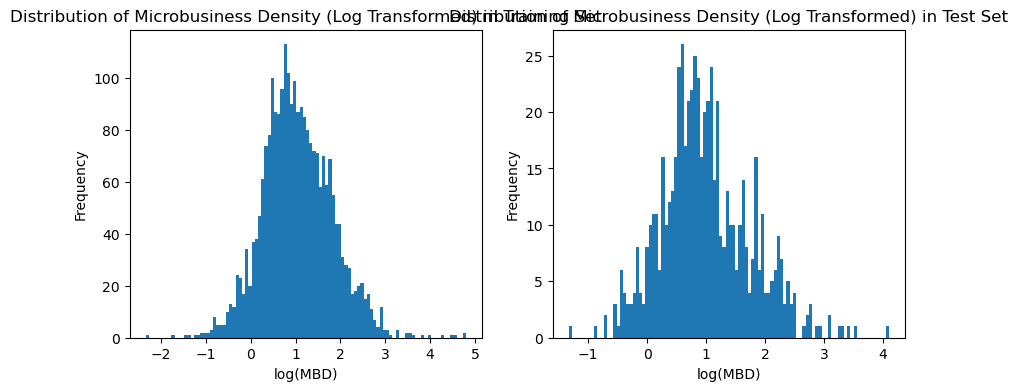

In [7]:
# set out 20% of the data as hidden test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# plot the distribution of log microbusiness_density in the training set and test set side by side
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(np.log(train_set['microbusiness_density']), bins=100)
plt.xlabel('log(MBD)')
plt.ylabel('Frequency')
plt.title('Distribution of Microbusiness Density (Log Transformed) in Training Set')
plt.subplot(1, 2, 2)
plt.hist(np.log(test_set['microbusiness_density']), bins=100)
plt.xlabel('log(MBD)')
plt.ylabel('Frequency')
plt.title('Distribution of Microbusiness Density (Log Transformed) in Test Set')
plt.show()

In [8]:
print(train_set.columns.tolist())

['county', 'prev_year_access_to_exercise_opportunities', 'prev_year_adult_obesity', 'prev_year_adult_smoking', 'prev_year_air_pollution_particulate_matter', 'prev_year_alcohol_impaired_driving_deaths', 'prev_year_children_in_poverty', 'prev_year_children_in_single_parent_households', 'prev_year_dentists', 'prev_year_diabetes_monitoring', 'prev_year_drinking_water_violations', 'prev_year_driving_alone_to_work', 'prev_year_excessive_drinking', 'prev_year_flu_vaccinations', 'prev_year_food_environment_index', 'prev_year_high_school_completion', 'prev_year_income_inequality', 'prev_year_injury_deaths', 'prev_year_long_commute_driving_alone', 'prev_year_low_birthweight', 'prev_year_mammography_screening', 'prev_year_mental_health_providers', 'prev_year_physical_inactivity', 'prev_year_poor_mental_health_days', 'prev_year_poor_or_fair_health', 'prev_year_poor_physical_health_days', 'prev_year_premature_death', 'prev_year_preventable_hospital_stays', 'prev_year_primary_care_physicians', 'prev

In [9]:
test_set.to_csv('new_222_data_cleaned_test.csv', index=False)
train_set.to_csv('new_222_data_cleaned_train.csv', index=False)

In [10]:
train_set.index

Int64Index([ 758, 3134,  224,  546, 1398, 2249,  703, 3099, 1002, 1542,
            ...
             333, 1241,  469, 2174, 1642, 3103, 1098, 1133, 1297,  863],
           dtype='int64', length=2507)

In [11]:
test_set.index

Int64Index([1791,  531,  452, 1295, 1100, 2009,  413, 2548, 2707, 3144,
            ...
            2474, 2508, 2218,  870, 3092, 2691, 1240, 2920, 2728, 2352],
           dtype='int64', length=627)

In [12]:
# get the index for train_set
train_index = train_set.index
# get the index for test_set
test_index = test_set.index

### Impute the missing values with KNN imputer

In [13]:
# show number of columns with missing values
print('Number of columns with missing values: ', df.isnull().any().sum())

Number of columns with missing values:  56


In [14]:
# impute with kNN for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# impute train_set
train_set_imputed = imputer.fit_transform(train_set)
train_set_imputed = pd.DataFrame(train_set_imputed, columns=train_set.columns, index=train_index)
# check if there is any missing value left
print('Number of columns with missing values: ', train_set_imputed.isnull().any().sum())

Number of columns with missing values:  0


In [15]:
# save train_set_imputed
train_set_imputed.to_csv('new_222_data_train_imputed.csv', index=False)

In [16]:
# impute test_set with the same imputer
test_set_imputed = imputer.transform(test_set)
test_set_imputed = pd.DataFrame(test_set_imputed, columns=test_set.columns, index=test_index)
# check if there is any missing value left
print('Number of columns with missing values: ', test_set_imputed.isnull().any().sum())

Number of columns with missing values:  0


In [17]:
# save test_set_imputed
test_set_imputed.to_csv('new_222_data_test_imputed.csv', index=False)